# CCE || MS Interpretation 4 | Archetype Frequency across the Dataset

In [1]:
# DATA HANDLING
import pandas as pd
import numpy as np
import ast
import math
from copy import deepcopy

# IMPORTING/EXPORTING
import json
import csv

# BESPOKE
import spectra_visualiser as vis
import carboxy as cbx

# VISUALISATION
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

# MACHINE LEARNING
from sklearn.decomposition import (PCA, NMF, LatentDirichletAllocation)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from scipy.spatial.distance import cosine

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
f = open('output_interpretation//cce_arr_rt_Part3.csv')
arr_rt = np.loadtxt(f, delimiter=',')

f = open('output_interpretation//cce_arr_50_Part3.csv')
arr_50 = np.loadtxt(f, delimiter=',')

f = open('output_interpretation//cce_arr_ST_Part3.csv')
arr_ST = np.loadtxt(f, delimiter=',')

In [3]:
with open('output_interpretation//cce_count_rt.txt') as f:
    count_temp = json.loads(f.read())
    
count_rt = {}
for key in count_temp:
    count_rt[float(key)] = count_temp[key]
    
with open('output_interpretation//cce_count_50.txt') as f:
    count_temp = json.loads(f.read())
    
count_50 = {}
for key in count_temp:
    count_50[float(key)] = count_temp[key]
    
with open('output_interpretation//cce_count_ST.txt') as f:
    count_temp = json.loads(f.read())
    
count_ST = {}
for key in count_temp:
    count_ST[float(key)] = count_temp[key]

In [4]:
df_rt_amf = pd.read_csv('output_interpretation//cce_df_rt.csv', index_col=0)
df_50_amf = pd.read_csv('output_interpretation//cce_df_50.csv', index_col=0)
df_ST_amf = pd.read_csv('output_interpretation//cce_df_ST.csv', index_col=0)

## Archetype Composition and Representation throughout the Dataset (from Part 2)

In [5]:
def feature_scale(x, min_x=0.0, max_x=2.6228362375479755, a=0.0, b=1.0):
    f1 = (x - min_x)*(b-a)
    f2 = (max_x - min_x)
    x_prime = a + (f1 / f2)
    return x_prime

def nmf_of_section(arr, n_components, lower_limit, upper_limit):
    #nmf = NMF(n_components=n_components, init=None).fit_transform(arr[lower_limit:upper_limit])

    model = NMF(n_components=n_components, init=None)
    W = model.fit_transform(arr[lower_limit:upper_limit])
    H = model.components_
    err = model.reconstruction_err_

    df_H = pd.DataFrame(H)
    
    return W, H, err, df_H

def pca_of_section(arr, n_components, lower_limit, upper_limit):
    model = PCA(n_components=n_components)
    X_fit = model.fit_transform(arr[lower_limit:upper_limit])
    X_comp = model.components_
    var = model.explained_variance_
    var_ratio = model.explained_variance_ratio_

    df_comp = pd.DataFrame(X_comp)

    return X_fit, X_comp, var, var_ratio, df_comp
    
def archetypes(df_H, title:str=""):
    # get max_values for 
    maxes = []
    for col in df_H.columns:
        maxes.append(max(df_H[col]))
    max_value = max(maxes)
       
def sample_composition(W, title="", cmap='binary'):
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(W, cmap)
    ax.set_ylabel('Experiment #', fontsize=12)
    ax.set_xlabel('MS Archetypes', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')

    fig.tight_layout()
    fig.savefig('C://Users//group//Documents//W matrix.png')

## Rerurn By Temperature with Correct Number of Components

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


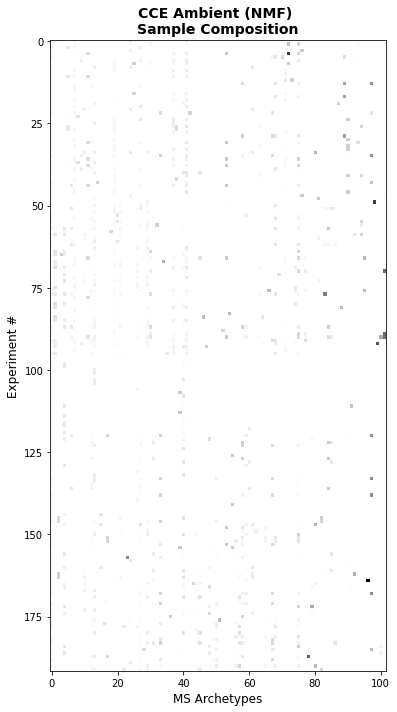

In [6]:
W_rt, H_rt, err_rt, df_H_rt = nmf_of_section(arr_rt, 102, 0, 192)
sample_composition(W_rt, 'CCE Ambient (NMF) \nSample Composition')

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


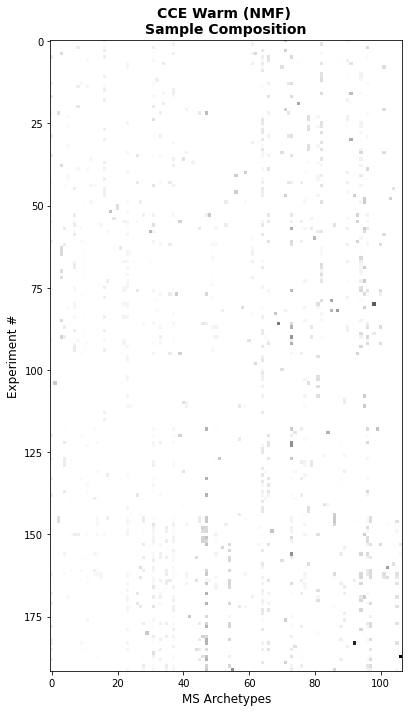

In [7]:
W_50, H_50, err_50, df_H_50 = nmf_of_section(arr_50, 107, 0, 192)
sample_composition(W_50, 'CCE Warm (NMF) \nSample Composition')

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


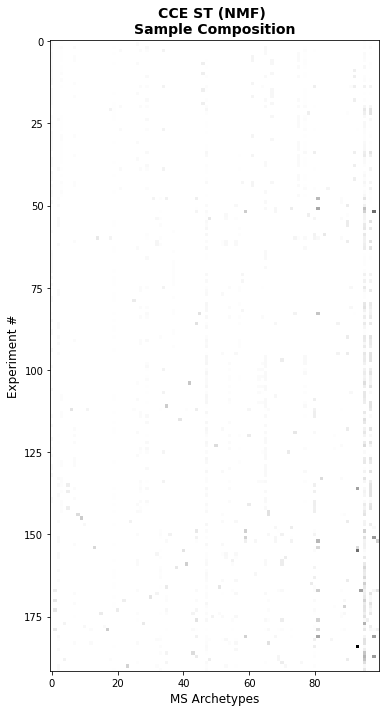

In [8]:
W_ST, H_ST, err_ST, df_H_ST = nmf_of_section(arr_ST, 100, 0, 192)
sample_composition(W_ST, 'CCE ST (NMF) \nSample Composition')

## Frequency of Each Archetype with Iteration

### Ambient Conditions

In [9]:
W = W_rt

traces = []

for i in W.T:
    trace = [
        sum(i[:48]),
        sum(i[48:96]),
        sum(i[96:144]),
        sum(i[144:]),
    ]
    
    traces.append(trace)

len(traces)

type1a = []
type1b = []
type2a = []
type2b = []
type3a = []
type3b = []
type4a = []
type4b = []
type5a = []
type5b = []
type6a = []
type6b = []
type7a = []
type7b = []
type8a = []
type8b = []

classification_rt = []


for i in traces:
    if (i[0] <= i[1]) and (i[1] <= i[2]) and (i[2] <= i[3]) and (i[1] <= i[3]):
        type1a.append(i)
        classification_rt.append('1a')
    elif (i[0] <= i[1]) and (i[1] <= i[2]) and (i[2] <= i[3]) and (i[1] >= i[3]):
        type1b.append(i)
        classification_rt.append('1b')
        
    elif (i[0] <= i[1]) and (i[1] <= i[2]) and (i[2] >= i[3]) and (i[1] <= i[3]):
        type2a.append(i)
        classification_rt.append('2a')
    elif (i[0] <= i[1]) and (i[1] <= i[2]) and (i[2] >= i[3]) and (i[1] >= i[3]):
        type2b.append(i)
        classification_rt.append('2b')
        
    elif (i[0] <= i[1]) and (i[1] >= i[2]) and (i[2] <= i[3]) and (i[1] <= i[3]):
        type3a.append(i)
        classification_rt.append('3a')
    elif (i[0] <= i[1]) and (i[1] >= i[2]) and (i[2] <= i[3]) and (i[1] >= i[3]):
        type3b.append(i)
        classification_rt.append('3b')
        
    elif (i[0] <= i[1]) and (i[1] >= i[2]) and (i[2] >= i[3]) and (i[1] <= i[3]):
        type4a.append(i)
        classification_rt.append('4a')
    elif (i[0] <= i[1]) and (i[1] >= i[2]) and (i[2] >= i[3]) and (i[1] >= i[3]):
        type4b.append(i)
        classification_rt.append('4b')
        
    elif (i[0] >= i[1]) and (i[1] <= i[2]) and (i[2] <= i[3]) and (i[1] <= i[3]):
        type5a.append(i)
        classification_rt.append('5a')
    elif (i[0] >= i[1]) and (i[1] <= i[2]) and (i[2] <= i[3]) and (i[1] >= i[3]):
        type5b.append(i)
        classification_rt.append('5b')
        
    elif (i[0] >= i[1]) and (i[1] <= i[2]) and (i[2] >= i[3]) and (i[1] <= i[3]):
        type6a.append(i)
        classification_rt.append('6a')
    elif (i[0] >= i[1]) and (i[1] <= i[2]) and (i[2] >= i[3]) and (i[1] >= i[3]):
        type6b.append(i)
        classification_rt.append('6b')
        
    elif (i[0] >= i[1]) and (i[1] >= i[2]) and (i[2] <= i[3]) and (i[1] <= i[3]):
        type7a.append(i)
        classification_rt.append('7a')
    elif (i[0] >= i[1]) and (i[1] >= i[2]) and (i[2] <= i[3]) and (i[1] >= i[3]):
        type7b.append(i)
        classification_rt.append('7b')

    elif (i[0] >= i[1]) and (i[1] >= i[2]) and (i[2] >= i[3]) and (i[1] <= i[3]):
        type8a.append(i)
        classification_rt.append('8a')
    elif (i[0] >= i[1]) and (i[1] >= i[2]) and (i[2] >= i[3]) and (i[1] >= i[3]):
        type8b.append(i)
        classification_rt.append('8b')
        
len_rt = (len(type1a), len(type1b),
          len(type2a),len(type2b),
          len(type3a),len(type3b),
          len(type4a),len(type4b),
          len(type5a),len(type5b),
          len(type6a),len(type6b),
          len(type7a),len(type7b),
          len(type8a),len(type8b)
         )

print(len_rt)
print(len(type1b), len(type8a))

(9, 0, 4, 1, 6, 29, 0, 7, 23, 0, 2, 0, 4, 13, 0, 4)
0 0


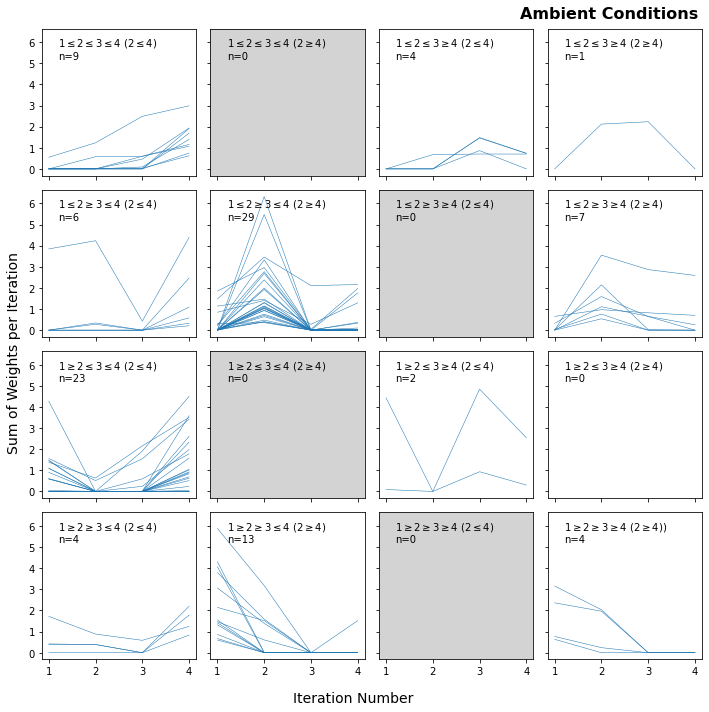

In [10]:
fig,ax = plt.subplots(4,4, figsize=(10,10), sharey=True, sharex=True)

ax[0,1].set_facecolor('lightgrey')
ax[1,2].set_facecolor('lightgrey')
ax[2,1].set_facecolor('lightgrey')
ax[3,2].set_facecolor('lightgrey')

ax[0,0].annotate(('1$\leq$2$\leq$3$\leq$4 (2$\leq$4) \nn='+str(len(type1a))), va='center', xy=(1.2,5.7), xycoords='data')
ax[0,1].annotate(('1$\leq$2$\leq$3$\leq$4 (2$\geq$4) \nn='+str(len(type1b))), va='center', xy=(1.2,5.7), xycoords='data')
ax[0,2].annotate(('1$\leq$2$\leq$3$\geq$4 (2$\leq$4) \nn='+str(len(type2a))), va='center', xy=(1.2,5.7), xycoords='data')
ax[0,3].annotate(('1$\leq$2$\leq$3$\geq$4 (2$\geq$4) \nn='+str(len(type2b))), va='center', xy=(1.2,5.7), xycoords='data')
ax[1,0].annotate(('1$\leq$2$\geq$3$\leq$4 (2$\leq$4) \nn='+str(len(type3a))), va='center', xy=(1.2,5.7), xycoords='data')
ax[1,1].annotate(('1$\leq$2$\geq$3$\leq$4 (2$\geq$4) \nn='+str(len(type3b))), va='center', xy=(1.2,5.7), xycoords='data')
ax[1,2].annotate(('1$\leq$2$\geq$3$\geq$4 (2$\leq$4) \nn='+str(len(type4a))), va='center', xy=(1.2,5.7), xycoords='data')
ax[1,3].annotate(('1$\leq$2$\geq$3$\geq$4 (2$\geq$4) \nn='+str(len(type4b))), va='center', xy=(1.2,5.7), xycoords='data')
ax[2,0].annotate(('1$\geq$2$\leq$3$\leq$4 (2$\leq$4) \nn='+str(len(type5a))), va='center', xy=(1.2,5.7), xycoords='data')
ax[2,1].annotate(('1$\geq$2$\leq$3$\leq$4 (2$\geq$4) \nn='+str(len(type5b))), va='center', xy=(1.2,5.7), xycoords='data')
ax[2,2].annotate(('1$\geq$2$\leq$3$\geq$4 (2$\leq$4) \nn='+str(len(type6a))), va='center', xy=(1.2,5.7), xycoords='data')
ax[2,3].annotate(('1$\geq$2$\leq$3$\geq$4 (2$\geq$4) \nn='+str(len(type6b))), va='center', xy=(1.2,5.7), xycoords='data')
ax[3,0].annotate(('1$\geq$2$\geq$3$\leq$4 (2$\leq$4) \nn='+str(len(type7a))), va='center', xy=(1.2,5.7), xycoords='data')
ax[3,1].annotate(('1$\geq$2$\geq$3$\leq$4 (2$\geq$4) \nn='+str(len(type7b))), va='center', xy=(1.2,5.7), xycoords='data')
ax[3,2].annotate(('1$\geq$2$\geq$3$\geq$4 (2$\leq$4) \nn='+str(len(type8a))), va='center', xy=(1.2,5.7), xycoords='data')
ax[3,3].annotate(('1$\geq$2$\geq$3$\geq$4 (2$\geq$4)) \nn='+str(len(type8b))), va='center', xy=(1.2,5.7), xycoords='data')


plot_color='tab:blue'

for i in type1a:
    ax[0,0].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type1b:
    ax[0,1].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type2a:
    ax[0,2].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type2b:
    ax[0,3].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type3a:
    ax[1,0].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type3b:
    ax[1,1].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type4a:
    ax[1,2].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type4b:
    ax[1,3].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type5a:
    ax[2,0].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type5b:
    ax[2,1].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type6a:
    ax[2,2].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type6b:
    ax[2,3].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type7a:
    ax[3,0].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type7b:
    ax[3,1].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type8a:
    ax[3,2].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type8b:
    ax[3,3].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)

    
fig.supylabel('Sum of Weights per Iteration', fontsize=14)
fig.supxlabel('Iteration Number', fontsize=14)
fig.suptitle('Ambient Conditions', fontsize=16, fontweight='bold', x=0.98, ha='right')
fig.tight_layout()

In [11]:
all_origins = []
for item in [
    type1a,type1b,type2a,type2b,type3a,type3b,type4a,type4b,type5a,type5b,type6a,type6b,type7a,type7b,type8a,type8b
]:
    origin = []
    for i in item:
        if i[0] == 0 and i[1] == 0 and i[2] == 0:
            origin.append(4)
        elif i[0] == 0 and i[1] == 0 and i[2] > 0:
            origin.append(3)
        elif i[0] == 0 and i[1] > 0:
            origin.append(2)
        elif i[0] > 0:
            origin.append(1)
    all_origins.append(origin)

count_rt1, count_rt2, count_rt3, count_rt4 = 0, 0, 0, 0
    
for i in all_origins:
    for j in i:
        if j == 1:
            count_rt1 += 1
        if j == 2:
            count_rt2 +=1
        if j == 3:
            count_rt3 += 1
        if j == 4:
            count_rt4 +=1   

### Warm Conditions

In [12]:
W = W_50

traces = []

for i in W.T:
    trace = [
        sum(i[:48]),
        sum(i[48:96]),
        sum(i[96:144]),
        sum(i[144:]),
    ]
    
    traces.append(trace)

len(traces)

type1a = []
type1b = []
type2a = []
type2b = []
type3a = []
type3b = []
type4a = []
type4b = []
type5a = []
type5b = []
type6a = []
type6b = []
type7a = []
type7b = []
type8a = []
type8b = []

classification_50 = []


for i in traces:
    if (i[0] <= i[1]) and (i[1] <= i[2]) and (i[2] <= i[3]) and (i[1] <= i[3]):
        type1a.append(i)
        classification_50.append('1a')
    elif (i[0] <= i[1]) and (i[1] <= i[2]) and (i[2] <= i[3]) and (i[1] >= i[3]):
        type1b.append(i)
        classification_50.append('1b')
        
    elif (i[0] <= i[1]) and (i[1] <= i[2]) and (i[2] >= i[3]) and (i[1] <= i[3]):
        type2a.append(i)
        classification_50.append('2a')
    elif (i[0] <= i[1]) and (i[1] <= i[2]) and (i[2] >= i[3]) and (i[1] >= i[3]):
        type2b.append(i)
        classification_50.append('2b')
        
    elif (i[0] <= i[1]) and (i[1] >= i[2]) and (i[2] <= i[3]) and (i[1] <= i[3]):
        type3a.append(i)
        classification_50.append('3a')
    elif (i[0] <= i[1]) and (i[1] >= i[2]) and (i[2] <= i[3]) and (i[1] >= i[3]):
        type3b.append(i)
        classification_50.append('3b')
        
    elif (i[0] <= i[1]) and (i[1] >= i[2]) and (i[2] >= i[3]) and (i[1] <= i[3]):
        type4a.append(i)
        classification_50.append('4a')
    elif (i[0] <= i[1]) and (i[1] >= i[2]) and (i[2] >= i[3]) and (i[1] >= i[3]):
        type4b.append(i)
        classification_50.append('4b')
        
    elif (i[0] >= i[1]) and (i[1] <= i[2]) and (i[2] <= i[3]) and (i[1] <= i[3]):
        type5a.append(i)
        classification_50.append('5a')
    elif (i[0] >= i[1]) and (i[1] <= i[2]) and (i[2] <= i[3]) and (i[1] >= i[3]):
        type5b.append(i)
        classification_50.append('5b')
        
    elif (i[0] >= i[1]) and (i[1] <= i[2]) and (i[2] >= i[3]) and (i[1] <= i[3]):
        type6a.append(i)
        classification_50.append('6a')
    elif (i[0] >= i[1]) and (i[1] <= i[2]) and (i[2] >= i[3]) and (i[1] >= i[3]):
        type6b.append(i)
        classification_50.append('6b')
        
    elif (i[0] >= i[1]) and (i[1] >= i[2]) and (i[2] <= i[3]) and (i[1] <= i[3]):
        type7a.append(i)
        classification_50.append('7a')
    elif (i[0] >= i[1]) and (i[1] >= i[2]) and (i[2] <= i[3]) and (i[1] >= i[3]):
        type7b.append(i)
        classification_50.append('7b')

    elif (i[0] >= i[1]) and (i[1] >= i[2]) and (i[2] >= i[3]) and (i[1] <= i[3]):
        type8a.append(i)
        classification_50.append('8a')
    elif (i[0] >= i[1]) and (i[1] >= i[2]) and (i[2] >= i[3]) and (i[1] >= i[3]):
        type8b.append(i)
        classification_50.append('8b')
        
len_50 = (len(type1a), len(type1b),
          len(type2a),len(type2b),
          len(type3a),len(type3b),
          len(type4a),len(type4b),
          len(type5a),len(type5b),
          len(type6a),len(type6b),
          len(type7a),len(type7b),
          len(type8a),len(type8b)
         )

print(len_50)
print(len(type1b), len(type8a))

(10, 0, 7, 2, 17, 27, 0, 6, 10, 0, 6, 1, 13, 7, 0, 1)
0 0


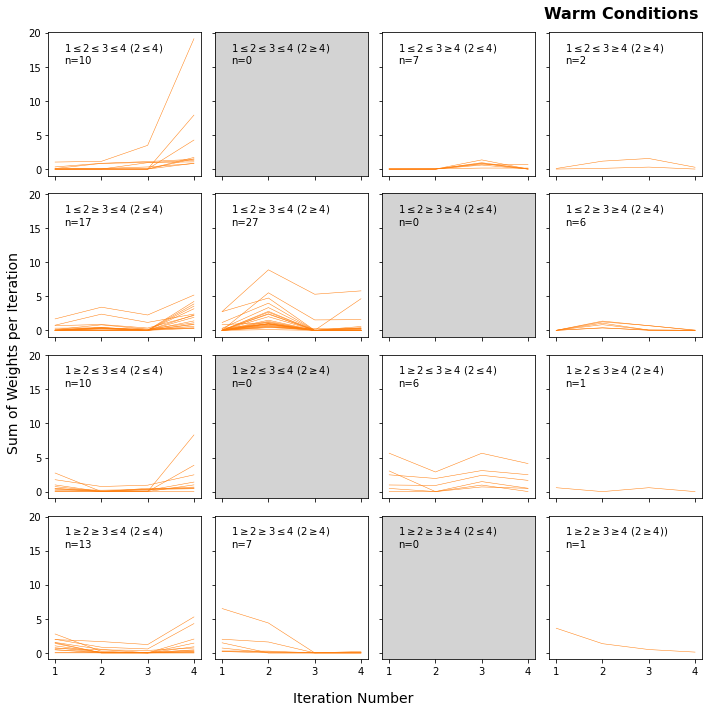

In [13]:
fig,ax = plt.subplots(4,4, figsize=(10,10), sharey=True, sharex=True)

ax[0,1].set_facecolor('lightgrey')
ax[1,2].set_facecolor('lightgrey')
ax[2,1].set_facecolor('lightgrey')
ax[3,2].set_facecolor('lightgrey')

ax[0,0].annotate(('1$\leq$2$\leq$3$\leq$4 (2$\leq$4) \nn='+str(len(type1a))), va='center', xy=(1.2,17), xycoords='data')
ax[0,1].annotate(('1$\leq$2$\leq$3$\leq$4 (2$\geq$4) \nn='+str(len(type1b))), va='center', xy=(1.2,17), xycoords='data')
ax[0,2].annotate(('1$\leq$2$\leq$3$\geq$4 (2$\leq$4) \nn='+str(len(type2a))), va='center', xy=(1.2,17), xycoords='data')
ax[0,3].annotate(('1$\leq$2$\leq$3$\geq$4 (2$\geq$4) \nn='+str(len(type2b))), va='center', xy=(1.2,17), xycoords='data')
ax[1,0].annotate(('1$\leq$2$\geq$3$\leq$4 (2$\leq$4) \nn='+str(len(type3a))), va='center', xy=(1.2,17), xycoords='data')
ax[1,1].annotate(('1$\leq$2$\geq$3$\leq$4 (2$\geq$4) \nn='+str(len(type3b))), va='center', xy=(1.2,17), xycoords='data')
ax[1,2].annotate(('1$\leq$2$\geq$3$\geq$4 (2$\leq$4) \nn='+str(len(type4a))), va='center', xy=(1.2,17), xycoords='data')
ax[1,3].annotate(('1$\leq$2$\geq$3$\geq$4 (2$\geq$4) \nn='+str(len(type4b))), va='center', xy=(1.2,17), xycoords='data')
ax[2,0].annotate(('1$\geq$2$\leq$3$\leq$4 (2$\leq$4) \nn='+str(len(type5a))), va='center', xy=(1.2,17), xycoords='data')
ax[2,1].annotate(('1$\geq$2$\leq$3$\leq$4 (2$\geq$4) \nn='+str(len(type5b))), va='center', xy=(1.2,17), xycoords='data')
ax[2,2].annotate(('1$\geq$2$\leq$3$\geq$4 (2$\leq$4) \nn='+str(len(type6a))), va='center', xy=(1.2,17), xycoords='data')
ax[2,3].annotate(('1$\geq$2$\leq$3$\geq$4 (2$\geq$4) \nn='+str(len(type6b))), va='center', xy=(1.2,17), xycoords='data')
ax[3,0].annotate(('1$\geq$2$\geq$3$\leq$4 (2$\leq$4) \nn='+str(len(type7a))), va='center', xy=(1.2,17), xycoords='data')
ax[3,1].annotate(('1$\geq$2$\geq$3$\leq$4 (2$\geq$4) \nn='+str(len(type7b))), va='center', xy=(1.2,17), xycoords='data')
ax[3,2].annotate(('1$\geq$2$\geq$3$\geq$4 (2$\leq$4) \nn='+str(len(type8a))), va='center', xy=(1.2,17), xycoords='data')
ax[3,3].annotate(('1$\geq$2$\geq$3$\geq$4 (2$\geq$4)) \nn='+str(len(type8b))), va='center', xy=(1.2,17), xycoords='data')


plot_color='tab:orange'

for i in type1a:
    ax[0,0].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type1b:
    ax[0,1].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type2a:
    ax[0,2].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type2b:
    ax[0,3].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type3a:
    ax[1,0].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type3b:
    ax[1,1].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type4a:
    ax[1,2].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type4b:
    ax[1,3].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type5a:
    ax[2,0].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type5b:
    ax[2,1].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type6a:
    ax[2,2].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type6b:
    ax[2,3].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type7a:
    ax[3,0].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type7b:
    ax[3,1].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type8a:
    ax[3,2].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type8b:
    ax[3,3].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)

    
fig.supylabel('Sum of Weights per Iteration', fontsize=14)
fig.supxlabel('Iteration Number', fontsize=14)
fig.suptitle('Warm Conditions', fontsize=16, fontweight='bold', x=0.98, ha='right')
fig.tight_layout()

In [14]:
all_origins = []
for item in [
    type1a,type1b,type2a,type2b,type3a,type3b,type4a,type4b,type5a,type5b,type6a,type6b,type7a,type7b,type8a,type8b
]:
    origin = []
    for i in item:
        if i[0] == 0 and i[1] == 0 and i[2] == 0:
            origin.append(4)
        elif i[0] == 0 and i[1] == 0 and i[2] > 0:
            origin.append(3)
        elif i[0] == 0 and i[1] > 0:
            origin.append(2)
        elif i[0] > 0:
            origin.append(1)
    all_origins.append(origin)

count_501, count_502, count_503, count_504 = 0, 0, 0, 0
    
for i in all_origins:
    for j in i:
        if j == 1:
            count_501 += 1
        if j == 2:
            count_502 +=1
        if j == 3:
            count_503 += 1
        if j == 4:
            count_504 +=1   

### Solvothermal Conditions

In [15]:
W = W_ST

traces = []

for i in W.T:
    trace = [
        sum(i[:48]),
        sum(i[48:96]),
        sum(i[96:144]),
        sum(i[144:]),
    ]
    
    traces.append(trace)

len(traces)

type1a = []
type1b = []
type2a = []
type2b = []
type3a = []
type3b = []
type4a = []
type4b = []
type5a = []
type5b = []
type6a = []
type6b = []
type7a = []
type7b = []
type8a = []
type8b = []

classification_ST = []

for i in traces:
    if (i[0] <= i[1]) and (i[1] <= i[2]) and (i[2] <= i[3]) and (i[1] <= i[3]):
        type1a.append(i)
        classification_ST.append('1a')
    elif (i[0] <= i[1]) and (i[1] <= i[2]) and (i[2] <= i[3]) and (i[1] >= i[3]):
        type1b.append(i)
        classification_ST.append('1b')
        
    elif (i[0] <= i[1]) and (i[1] <= i[2]) and (i[2] >= i[3]) and (i[1] <= i[3]):
        type2a.append(i)
        classification_ST.append('2a')
    elif (i[0] <= i[1]) and (i[1] <= i[2]) and (i[2] >= i[3]) and (i[1] >= i[3]):
        type2b.append(i)
        classification_ST.append('2b')
        
    elif (i[0] <= i[1]) and (i[1] >= i[2]) and (i[2] <= i[3]) and (i[1] <= i[3]):
        type3a.append(i)
        classification_ST.append('3a')
    elif (i[0] <= i[1]) and (i[1] >= i[2]) and (i[2] <= i[3]) and (i[1] >= i[3]):
        type3b.append(i)
        classification_ST.append('3b')
        
    elif (i[0] <= i[1]) and (i[1] >= i[2]) and (i[2] >= i[3]) and (i[1] <= i[3]):
        type4a.append(i)
        classification_ST.append('4a')
    elif (i[0] <= i[1]) and (i[1] >= i[2]) and (i[2] >= i[3]) and (i[1] >= i[3]):
        type4b.append(i)
        classification_ST.append('4b')
    
    elif (i[0] >= i[1]) and (i[1] <= i[2]) and (i[2] <= i[3]) and (i[1] <= i[3]):
        type5a.append(i)
        classification_ST.append('5a')
    elif (i[0] >= i[1]) and (i[1] <= i[2]) and (i[2] <= i[3]) and (i[1] >= i[3]):
        type5b.append(i)
        classification_ST.append('5b')
        
    elif (i[0] >= i[1]) and (i[1] <= i[2]) and (i[2] >= i[3]) and (i[1] <= i[3]):
        type6a.append(i)
        classification_ST.append('6a')
    elif (i[0] >= i[1]) and (i[1] <= i[2]) and (i[2] >= i[3]) and (i[1] >= i[3]):
        type6b.append(i)
        classification_ST.append('6b')
        
    elif (i[0] >= i[1]) and (i[1] >= i[2]) and (i[2] <= i[3]) and (i[1] <= i[3]):
        type7a.append(i)
        classification_ST.append('7a')
    elif (i[0] >= i[1]) and (i[1] >= i[2]) and (i[2] <= i[3]) and (i[1] >= i[3]):
        type7b.append(i)
        classification_ST.append('7b')

    elif (i[0] >= i[1]) and (i[1] >= i[2]) and (i[2] >= i[3]) and (i[1] <= i[3]):
        type8a.append(i)
        classification_ST.append('8a')
    elif (i[0] >= i[1]) and (i[1] >= i[2]) and (i[2] >= i[3]) and (i[1] >= i[3]):
        type8b.append(i)
        classification_ST.append('8b')
        
len_ST = (len(type1a), len(type1b),
          len(type2a),len(type2b),
          len(type3a),len(type3b),
          len(type4a),len(type4b),
          len(type5a),len(type5b),
          len(type6a),len(type6b),
          len(type7a),len(type7b),
          len(type8a),len(type8b)
         )

print(len_ST)
print(len(type1b), len(type8a))



(13, 0, 4, 10, 27, 11, 0, 6, 12, 0, 6, 6, 1, 1, 0, 3)
0 0


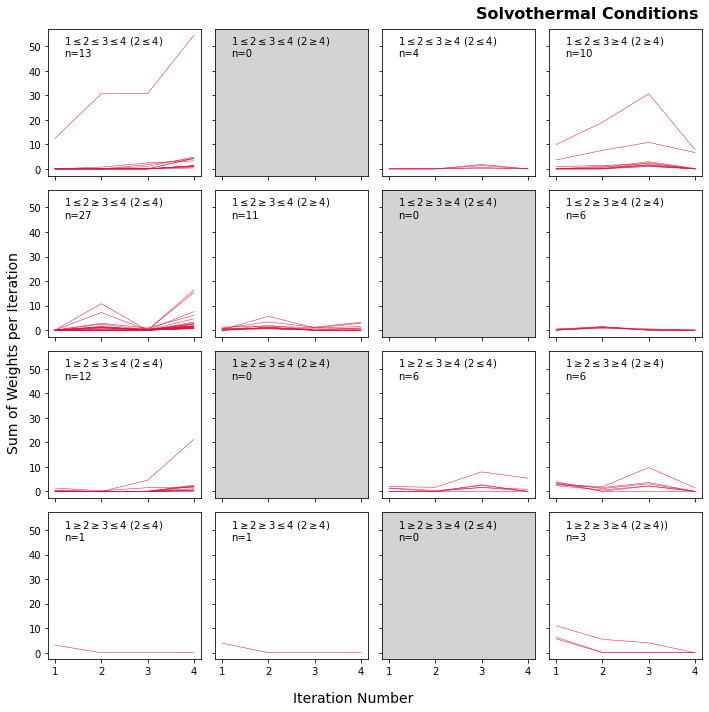

In [16]:
fig,ax = plt.subplots(4,4, figsize=(10,10), sharey=True, sharex=True)

ax[0,1].set_facecolor('lightgrey')
ax[1,2].set_facecolor('lightgrey')
ax[2,1].set_facecolor('lightgrey')
ax[3,2].set_facecolor('lightgrey')

ax[0,0].annotate(('1$\leq$2$\leq$3$\leq$4 (2$\leq$4) \nn='+str(len(type1a))), va='center', xy=(1.2,50), xycoords='data')
ax[0,1].annotate(('1$\leq$2$\leq$3$\leq$4 (2$\geq$4) \nn='+str(len(type1b))), va='center', xy=(1.2,50), xycoords='data')
ax[0,2].annotate(('1$\leq$2$\leq$3$\geq$4 (2$\leq$4) \nn='+str(len(type2a))), va='center', xy=(1.2,50), xycoords='data')
ax[0,3].annotate(('1$\leq$2$\leq$3$\geq$4 (2$\geq$4) \nn='+str(len(type2b))), va='center', xy=(1.2,50), xycoords='data')
ax[1,0].annotate(('1$\leq$2$\geq$3$\leq$4 (2$\leq$4) \nn='+str(len(type3a))), va='center', xy=(1.2,50), xycoords='data')
ax[1,1].annotate(('1$\leq$2$\geq$3$\leq$4 (2$\geq$4) \nn='+str(len(type3b))), va='center', xy=(1.2,50), xycoords='data')
ax[1,2].annotate(('1$\leq$2$\geq$3$\geq$4 (2$\leq$4) \nn='+str(len(type4a))), va='center', xy=(1.2,50), xycoords='data')
ax[1,3].annotate(('1$\leq$2$\geq$3$\geq$4 (2$\geq$4) \nn='+str(len(type4b))), va='center', xy=(1.2,50), xycoords='data')
ax[2,0].annotate(('1$\geq$2$\leq$3$\leq$4 (2$\leq$4) \nn='+str(len(type5a))), va='center', xy=(1.2,50), xycoords='data')
ax[2,1].annotate(('1$\geq$2$\leq$3$\leq$4 (2$\geq$4) \nn='+str(len(type5b))), va='center', xy=(1.2,50), xycoords='data')
ax[2,2].annotate(('1$\geq$2$\leq$3$\geq$4 (2$\leq$4) \nn='+str(len(type6a))), va='center', xy=(1.2,50), xycoords='data')
ax[2,3].annotate(('1$\geq$2$\leq$3$\geq$4 (2$\geq$4) \nn='+str(len(type6b))), va='center', xy=(1.2,50), xycoords='data')
ax[3,0].annotate(('1$\geq$2$\geq$3$\leq$4 (2$\leq$4) \nn='+str(len(type7a))), va='center', xy=(1.2,50), xycoords='data')
ax[3,1].annotate(('1$\geq$2$\geq$3$\leq$4 (2$\geq$4) \nn='+str(len(type7b))), va='center', xy=(1.2,50), xycoords='data')
ax[3,2].annotate(('1$\geq$2$\geq$3$\geq$4 (2$\leq$4) \nn='+str(len(type8a))), va='center', xy=(1.2,50), xycoords='data')
ax[3,3].annotate(('1$\geq$2$\geq$3$\geq$4 (2$\geq$4)) \nn='+str(len(type8b))), va='center', xy=(1.2,50), xycoords='data')


plot_color='crimson'

for i in type1a:
    ax[0,0].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type1b:
    ax[0,1].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type2a:
    ax[0,2].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type2b:
    ax[0,3].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type3a:
    ax[1,0].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type3b:
    ax[1,1].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type4a:
    ax[1,2].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type4b:
    ax[1,3].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type5a:
    ax[2,0].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type5b:
    ax[2,1].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type6a:
    ax[2,2].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type6b:
    ax[2,3].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type7a:
    ax[3,0].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type7b:
    ax[3,1].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
    
for i in type8a:
    ax[3,2].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)
for i in type8b:
    ax[3,3].plot([1,2,3,4], i, linewidth=0.5, color=plot_color)

    
fig.supylabel('Sum of Weights per Iteration', fontsize=14)
fig.supxlabel('Iteration Number', fontsize=14)
fig.suptitle('Solvothermal Conditions', fontsize=16, fontweight='bold', x=0.98, ha='right')
fig.tight_layout()

In [17]:
all_origins = []
for item in [
    type1a,type1b,type2a,type2b,type3a,type3b,type4a,type4b,type5a,type5b,type6a,type6b,type7a,type7b,type8a,type8b
]:
    origin = []
    for i in item:
        if i[0] == 0 and i[1] == 0 and i[2] == 0:
            origin.append(4)
        elif i[0] == 0 and i[1] == 0 and i[2] > 0:
            origin.append(3)
        elif i[0] == 0 and i[1] > 0:
            origin.append(2)
        elif i[0] > 0:
            origin.append(1)
    all_origins.append(origin)

count_ST1, count_ST2, count_ST3, count_ST4 = 0, 0, 0, 0
    
for i in all_origins:
    for j in i:
        if j == 1:
            count_ST1 += 1
        if j == 2:
            count_ST2 +=1
        if j == 3:
            count_ST3 += 1
        if j == 4:
            count_ST4 +=1   

## Archetype Origins

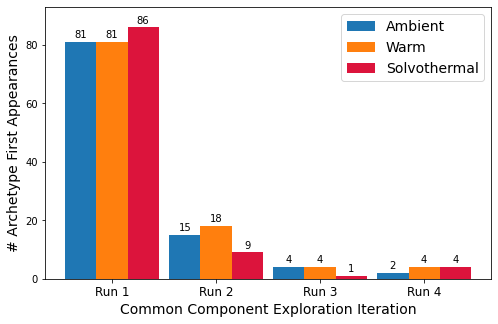

In [18]:
fig, ax = plt.subplots(figsize=(8,5))

width = 0.3

ax.set_ylim(0,93)

r1 = [1,2,3,4]
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

bars_rt = ax.bar(r1,[count_rt1,count_rt2,count_rt3,count_rt4], color='tab:blue', width=width, label='Ambient')
bars_50 = ax.bar(r2,[count_501,count_502,count_503,count_504], color='tab:orange', width=width, label='Warm')
bars_ST = ax.bar(r3,[count_ST1,count_ST2,count_ST3,count_ST4], color='crimson', width=width, label='Solvothermal')

ax.legend(fontsize=14)

ax.set_xticks(r2)
ax.set_xticklabels(['Run 1','Run 2','Run 3','Run 4'], fontsize=12)
ax.set_xlabel('Common Component Exploration Iteration', fontsize=14)
ax.set_ylabel('# Archetype First Appearances', fontsize=14)

ax.bar_label(bars_rt, padding=2)
ax.bar_label(bars_50, padding=2)
ax.bar_label(bars_ST, padding=2)

fig.savefig('output_interpretation\\Archetype Origins_CCE.png')

## Archetype Origin and Max Iterations

In [19]:
W = W_rt

traces = []

for i in W.T:
    trace = [
        sum(i[:48]),
        sum(i[48:96]),
        sum(i[96:144]),
        sum(i[144:]),
    ]
    
    traces.append(trace)

len(traces)


count_rt_ = []
max_rt = []

for i in traces:
    if i[0] > 0:
        count_rt_.append(1)
    elif i[0] == 0 and i[1] > 0:
        count_rt_.append(2)
    elif i[1] == 0 and i[2] > 0:
        count_rt_.append(3)
    elif i[2] == 0 and i[3] > 0:
        count_rt_.append(4)
        
    if i[0] == max(i):
        max_rt.append(1)
    if i[1] == max(i):
        max_rt.append(2)
    if i[2] == max(i):
        max_rt.append(3)
    if i[3] == max(i):
        max_rt.append(4)
        
        
print(
    'Freq Origins w/increasing iteration:',
    count_rt_.count(1),count_rt_.count(2),count_rt_.count(3),count_rt_.count(4)
)

print(
    'Freq Max w/increasing iteration:',
    max_rt.count(1),max_rt.count(2),max_rt.count(3),max_rt.count(4)
)

#df_rt = deepcopy(sum_sim_rt)
#df_rt.columns = ['Sum Cosine']

df_rt = pd.DataFrame(count_rt_)
df_rt.columns = ['Origin']
#df_rt['Origin'] = count_rt_
df_rt['Max'] = max_rt
df_rt['PlotOrigin'] = [x-0.2 for x in count_rt_]
df_rt['PlotMax'] = [x-0.2 for x in max_rt]

df_rt

Freq Origins w/increasing iteration: 81 15 4 2
Freq Max w/increasing iteration: 24 36 7 35


,Origin,Max,PlotOrigin,PlotMax
0,1,2,0.8,1.8
1,1,2,0.8,1.8
2,2,4,1.8,3.8
3,2,2,1.8,1.8
4,1,2,0.8,1.8
...,...,...,...,...
97,1,3,0.8,2.8
98,1,2,0.8,1.8
99,2,2,1.8,1.8
100,2,2,1.8,1.8


In [20]:
W = W_50

traces = []

for i in W.T:
    trace = [
        sum(i[:48]),
        sum(i[48:96]),
        sum(i[96:144]),
        sum(i[144:]),
    ]
    
    traces.append(trace)

len(traces)


count_50_ = []
max_50 = []

for i in traces:
    if i[0] > 0:
        count_50_.append(1)
    elif i[0] == 0 and i[1] > 0:
        count_50_.append(2)
    elif i[1] == 0 and i[2] > 0:
        count_50_.append(3)
    elif i[2] == 0 and i[3] > 0:
        count_50_.append(4)
        
    if i[0] == max(i):
        max_50.append(1)
    if i[1] == max(i):
        max_50.append(2)
    if i[2] == max(i):
        max_50.append(3)
    if i[3] == max(i):
        max_50.append(4)
        
        
print(
    'Freq Origins w/increasing iteration:',
    count_50_.count(1),count_50_.count(2),count_50_.count(3),count_50_.count(4)
)

print(
    'Freq Max w/increasing iteration:',
    max_50.count(1),max_50.count(2),max_50.count(3),max_50.count(4)
)

#df_50 = deepcopy(sum_sim_50)
#df_50.columns = ['Sum Cosine']

df_50 = pd.DataFrame(count_50_)
df_50.columns = ['Origin']
#df_50['Origin'] = count_50_
df_50['Max'] = max_50
df_50['PlotOrigin'] = [x for x in count_50_]
df_50['PlotMax'] = [x for x in max_50]

df_50

Freq Origins w/increasing iteration: 81 18 4 4
Freq Max w/increasing iteration: 21 33 13 40


,Origin,Max,PlotOrigin,PlotMax
0,1,4,1,4
1,1,3,1,3
2,1,4,1,4
3,1,2,1,2
4,1,3,1,3
...,...,...,...,...
102,1,4,1,4
103,1,2,1,2
104,1,1,1,1
105,2,4,2,4


In [21]:
W = W_ST

traces = []

for i in W.T:
    trace = [
        sum(i[:48]),
        sum(i[48:96]),
        sum(i[96:144]),
        sum(i[144:]),
    ]
    
    traces.append(trace)

len(traces)


count_ST_ = []
max_ST = []

for i in traces:
    if i[0] > 0:
        count_ST_.append(1)
    elif i[0] == 0 and i[1] > 0:
        count_ST_.append(2)
    elif i[1] == 0 and i[2] > 0:
        count_ST_.append(3)
    elif i[2] == 0 and i[3] > 0:
        count_ST_.append(4)
        
    if i[0] == max(i):
        max_ST.append(1)
    if i[1] == max(i):
        max_ST.append(2)
    if i[2] == max(i):
        max_ST.append(3)
    if i[3] == max(i):
        max_ST.append(4)
        
        
print(
    'Freq Origins w/increasing iteration:',
    count_ST_.count(1),count_ST_.count(2),count_ST_.count(3),count_ST_.count(4)
)

print(
    'Freq Max w/increasing iteration:',
    max_ST.count(1),max_ST.count(2),max_ST.count(3),max_ST.count(4)
)

#df_ST = deepcopy(sum_sim_ST)
#df_ST.columns = ['Sum Cosine']

df_ST = pd.DataFrame(count_ST_)
df_ST.columns = ['Origin']
#df_ST['Origin'] = count_ST_
df_ST['Max'] = max_ST
df_ST['PlotOrigin'] = [x+0.2 for x in count_ST_]
df_ST['PlotMax'] = [x+0.2 for x in max_ST]

df_ST

Freq Origins w/increasing iteration: 86 9 1 4
Freq Max w/increasing iteration: 11 17 21 51


,Origin,Max,PlotOrigin,PlotMax
0,1,1,1.2,1.2
1,4,4,4.2,4.2
2,1,2,1.2,2.2
3,1,1,1.2,1.2
4,1,4,1.2,4.2
...,...,...,...,...
95,1,4,1.2,4.2
96,2,4,2.2,4.2
97,1,3,1.2,3.2
98,2,4,2.2,4.2


In [22]:
for df in [df_rt,df_50,df_ST]:
    optimised = []

    for index, row in df.iterrows():
        if row['Origin'] == 1 and (row['Max'] == 2):
            optimised.append('yes')
        elif row['Origin'] == 1 and (row['Max'] == 4):
            optimised.append('yes')
        elif row['Origin'] == 2 and (row['Max'] == 2):
            optimised.append('meh')
        elif row['Origin'] == 2 and (row['Max'] == 4):
            optimised.append('yes')
        elif row['Origin'] == 3 and (row['Max'] == 2 or row['Max'] == 4):
            optimised.append('yes')
        elif row['Origin'] == 4 and (row['Max'] == 4):
            optimised.append('meh')
        else:
            optimised.append('no')

    df['Optimised?'] = optimised

display(df_rt)
display(df_50)
display(df_ST)

,Origin,Max,PlotOrigin,PlotMax,Optimised?
0,1,2,0.8,1.8,yes
1,1,2,0.8,1.8,yes
2,2,4,1.8,3.8,yes
3,2,2,1.8,1.8,meh
4,1,2,0.8,1.8,yes
...,...,...,...,...,...
97,1,3,0.8,2.8,no
98,1,2,0.8,1.8,yes
99,2,2,1.8,1.8,meh
100,2,2,1.8,1.8,meh


,Origin,Max,PlotOrigin,PlotMax,Optimised?
0,1,4,1,4,yes
1,1,3,1,3,no
2,1,4,1,4,yes
3,1,2,1,2,yes
4,1,3,1,3,no
...,...,...,...,...,...
102,1,4,1,4,yes
103,1,2,1,2,yes
104,1,1,1,1,no
105,2,4,2,4,yes


,Origin,Max,PlotOrigin,PlotMax,Optimised?
0,1,1,1.2,1.2,no
1,4,4,4.2,4.2,meh
2,1,2,1.2,2.2,yes
3,1,1,1.2,1.2,no
4,1,4,1.2,4.2,yes
...,...,...,...,...,...
95,1,4,1.2,4.2,yes
96,2,4,2.2,4.2,yes
97,1,3,1.2,3.2,no
98,2,4,2.2,4.2,yes


In [23]:
print(
    df_rt['Optimised?'].value_counts(), '\n',
    df_50['Optimised?'].value_counts(), '\n',
    df_ST['Optimised?'].value_counts(),
)

yes    59
no     31
meh    12
Name: Optimised?, dtype: int64 
 yes    60
no     34
meh    13
Name: Optimised?, dtype: int64 
 yes    63
no     32
meh     5
Name: Optimised?, dtype: int64


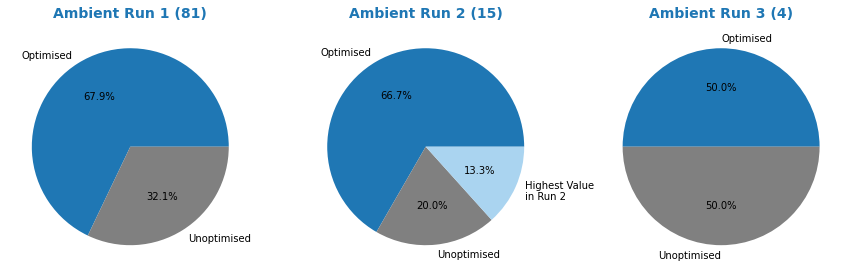

In [24]:
df_rt_1 = df_rt[df_rt['Origin'] == 1]
df_rt_2 = df_rt[df_rt['Origin'] == 2]
df_rt_3 = df_rt[df_rt['Origin'] == 3]
df_rt_4 = df_rt[df_rt['Origin'] == 4]


fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].pie(
    df_rt_1['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised'], 
    colors=['tab:blue','grey','lightgrey'],
    autopct='%1.1f%%'
)

n_1 = str(len(df_rt_1))
ax[0].set_title('Ambient Run 1 ('+n_1+')', color='tab:blue', fontsize=14, fontweight='bold')


ax[1].pie(
    df_rt_2['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised','Highest Value \nin Run 2'], 
    colors=['tab:blue','grey','#AAD4F0'],
    autopct='%1.1f%%'
)

n_2 = str(len(df_rt_2))
ax[1].set_title('Ambient Run 2 ('+n_2+')', color='tab:blue', fontsize=14, fontweight='bold')


ax[2].pie(
    df_rt_3['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised'], 
    colors=['tab:blue','grey','lightgrey'],
    autopct='%1.1f%%'
)

n_3 = str(len(df_rt_3))
ax[2].set_title(('Ambient Run 3 ('+n_3+')'), color='tab:blue', fontsize=14, fontweight='bold')

fig.savefig('output_interpretation//Pies_CCE_Ambient.png')

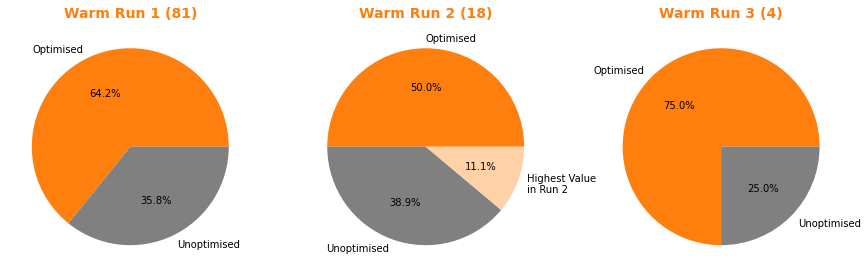

In [25]:
df_50_1 = df_50[df_50['Origin'] == 1]
df_50_2 = df_50[df_50['Origin'] == 2]
df_50_3 = df_50[df_50['Origin'] == 3]
df_50_4 = df_50[df_50['Origin'] == 4]

plot_color='tab:orange'

fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].pie(
    df_50_1['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised'], 
    colors=[plot_color,'grey','lightgrey'],
    autopct='%1.1f%%'
)

n_1 = str(len(df_50_1))
ax[0].set_title('Warm Run 1 ('+n_1+')', color=plot_color, fontsize=14, fontweight='bold')


ax[1].pie(
    df_50_2['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised','Highest Value \nin Run 2'], 
    colors=[plot_color,'grey','#FFD1A7'],
    autopct='%1.1f%%'
)

n_2 = str(len(df_50_2))
ax[1].set_title('Warm Run 2 ('+n_2+')', color=plot_color, fontsize=14, fontweight='bold')


ax[2].pie(
    df_50_3['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised'], 
    colors=[plot_color,'grey','lightgrey'],
    autopct='%1.1f%%'
)

n_3 = str(len(df_50_3))
ax[2].set_title(('Warm Run 3 ('+n_3+')'), color=plot_color, fontsize=14, fontweight='bold')

fig.savefig('output_interpretation//Pies_CCE_Warm.png')

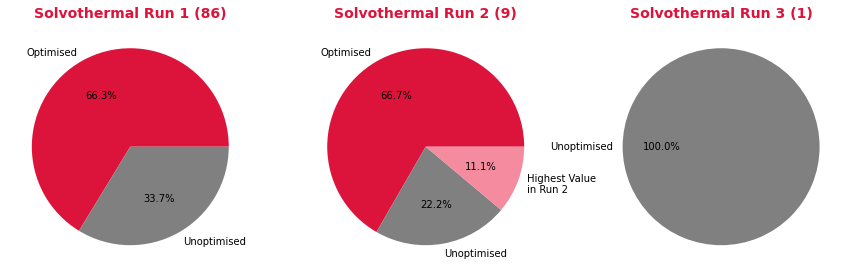

In [26]:
df_ST_1 = df_ST[df_ST['Origin'] == 1]
df_ST_2 = df_ST[df_ST['Origin'] == 2]
df_ST_3 = df_ST[df_ST['Origin'] == 3]
df_ST_4 = df_ST[df_ST['Origin'] == 4]

plot_color='crimson'

fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].pie(
    df_ST_1['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised'], 
    colors=[plot_color,'grey','#F58B9F'],
    autopct='%1.1f%%'
)

n_1 = str(len(df_ST_1))
ax[0].set_title('Solvothermal Run 1 ('+n_1+')', color=plot_color, fontsize=14, fontweight='bold')


ax[1].pie(
    df_ST_2['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised','Highest Value \nin Run 2'], 
    colors=[plot_color,'grey','#F58B9F'],
    autopct='%1.1f%%'
)

n_2 = str(len(df_ST_2))
ax[1].set_title('Solvothermal Run 2 ('+n_2+')', color=plot_color, fontsize=14, fontweight='bold')


ax[2].pie(
    df_ST_3['Optimised?'].value_counts(), 
    labels=['Unoptimised'], 
    colors=['grey'],
    autopct='%1.1f%%'
)

n_3 = str(len(df_ST_3))
ax[2].set_title(('Solvothermal Run 3 ('+n_3+')'), color=plot_color, fontsize=14, fontweight='bold')

fig.savefig('output_interpretation//Pies_CCE_Solvothermal.png')

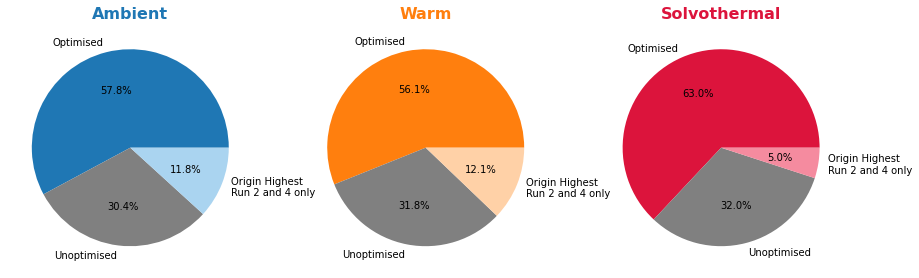

In [33]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].pie(
    df_rt['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised','Origin Highest \nRun 2 and 4 only'], 
    colors=['tab:blue','grey','#AAD4F0'],
    autopct='%1.1f%%'
)

ax[0].set_title('Ambient', color='tab:blue', fontsize=16, fontweight='bold')


ax[1].pie(
    df_50['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised','Origin Highest \nRun 2 and 4 only'], 
    colors=['tab:orange','grey','#FFD1A7'],
    autopct='%1.1f%%'
)

ax[1].set_title('Warm', color='tab:orange', fontsize=16, fontweight='bold')


ax[2].pie(
    df_ST['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised','Origin Highest \nRun 2 and 4 only'], 
    colors=['crimson','grey','#F58B9F'],
    autopct='%1.1f%%',
)

ax[2].set_title('Solvothermal', color='crimson', fontsize=16, fontweight='bold')



fig.savefig('output_interpretation//Pies_CCE_All.png')

## Patterns in Archetype Frequency with Iteration

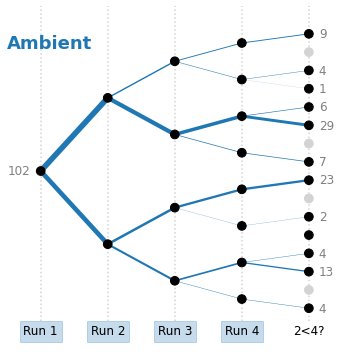

In [28]:
fig,ax = plt.subplots(1,1, figsize=(5,5))

ax.set_ylim(-4.75, 4.5)
ax.set_xlim(0.5, 5.5)

ax.axis('off')

len_plot = len_rt
plot_color = 'tab:blue'
pt_colors = [
    'k',
    'k','k',
    'k','k','k','k',
    'k','k','k','k','k','k','k','k',
    'k','lightgrey','k','k','k','k','lightgrey','k','k','lightgrey','k','k','k','k','lightgrey','k',
]

xs = [
    1, 
    2,2, 
    3,3,3,3, 
    4,4,4,4,4,4,4,4, 
    5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
]
ys = [
    0, 
    2,-2, 
    3,1,-1,-3, 
    3.5,2.5,1.5,0.5,-0.5,-1.5,-2.5,-3.5, 
    3.75,3.25,2.75,2.25,1.75,1.25,0.75,0.25,-0.25,-0.75,-1.25,-1.75,-2.25,-2.75,-3.25,-3.75
] 

ax.scatter(
    xs, ys,
    s = 75, color=pt_colors, zorder=2
)

width = len_plot[0] + len_plot[1] + len_plot[2] + len_plot[3] + len_plot[4] + len_plot[5] + len_plot[6] + len_plot[7]
ax.plot([1,2],[0,2], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[8] + len_plot[9] + len_plot[10] + len_plot[11] + len_plot[12] + len_plot[13] + len_plot[14] + len_plot[15]
ax.plot([1,2],[0,-2], linewidth=width/10, color=plot_color, zorder=1)



width = len_plot[0] + len_plot[1] + len_plot[2] + len_plot[3]
ax.plot([2,3],[2,3], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[4] + len_plot[5] + len_plot[6] + len_plot[7]
ax.plot([2,3],[2,1], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[8] + len_plot[9] + len_plot[10] + len_plot[11]
ax.plot([2,3],[-2,-1], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[12] + len_plot[13] + len_plot[14] + len_plot[15]
ax.plot([2,3],[-2,-3], linewidth=width/10, color=plot_color, zorder=1)



width = len_plot[0] + len_plot[1]
ax.plot([3,4],[3,3.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[2] + len_plot[3]
ax.plot([3,4],[3,2.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[4] + len_plot[5]
ax.plot([3,4],[1,1.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[6] + len_plot[7]
ax.plot([3,4],[1,0.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[8] + len_plot[9]
ax.plot([3,4],[-1,-0.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[10] + len_plot[11]
ax.plot([3,4],[-1,-1.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[12] + len_plot[13]
ax.plot([3,4],[-3,-2.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[14] + len_plot[15]
ax.plot([3,4],[-3,-3.5], linewidth=width/10, color=plot_color, zorder=1)



width = len_plot[0]
ax.plot([4,5],[3.5,3.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[1]
ax.plot([4,5],[3.5,3.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[2]
ax.plot([4,5],[2.5,2.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[3]
ax.plot([4,5],[2.5,2.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[4]
ax.plot([4,5],[1.5,1.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[5]
ax.plot([4,5],[1.5,1.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[6]
ax.plot([4,5],[0.5,0.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[7]
ax.plot([4,5],[0.5,0.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[8]
ax.plot([4,5],[-0.5,-0.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[9]
ax.plot([4,5],[-0.5,-0.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[10]
ax.plot([4,5],[-1.5,-1.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[11]
ax.plot([4,5],[-1.5,-1.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[12]
ax.plot([4,5],[-2.5,-2.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[13]
ax.plot([4,5],[-2.5,-2.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[14]
ax.plot([4,5],[-3.5,-3.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[15]
ax.plot([4,5],[-3.5,-3.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')


ax.plot([1,1],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')
ax.plot([2,2],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')
ax.plot([3,3],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')
ax.plot([4,4],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')
ax.plot([5,5],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')

ax.annotate('Run 1', fontsize=12,
            xy=(1,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox={'facecolor':plot_color, 'alpha':0.25, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Run 2', fontsize=12,
            xy=(2,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox={'facecolor':plot_color, 'alpha':0.25, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Run 3', fontsize=12,
            xy=(3,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox={'facecolor':plot_color, 'alpha':0.25, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Run 4', fontsize=12,
            xy=(4,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox={'facecolor':plot_color, 'alpha':0.25, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('2<4?', fontsize=12,
            xy=(5,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            #bbox={'facecolor':plot_color, 'alpha':0.35, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Ambient', fontsize=18, fontweight='bold', color=plot_color,
            xy=(0.5,3.75), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            #bbox={'facecolor':plot_color, 'alpha':0.35, 'edgecolor':plot_color},
            horizontalalignment='left', verticalalignment='top')



for x,y,len_ in zip(xs[15:],ys[15:],len_plot):
    if len_ != 0:
        ax.annotate(len_, fontsize=12, color='grey',
                    xy=(x+0.15,y), xycoords='data',
                    xytext=(0,0), textcoords='offset points',
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    #bbox={'facecolor':plot_color, 'alpha':0.35, 'edgecolor':plot_color},
                    horizontalalignment='left', verticalalignment='center')
        
ax.annotate(sum(len_plot), fontsize=12, color='grey',
            xy=(1-0.15,0), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            #bbox={'facecolor':plot_color, 'alpha':0.35, 'edgecolor':plot_color},
            horizontalalignment='right', verticalalignment='center')  

fig.tight_layout()
fig.savefig('output_interpretation//TreeDiagram_CCE_Ambient.png')

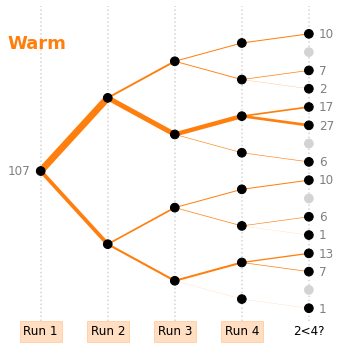

In [29]:
fig,ax = plt.subplots(1,1, figsize=(5,5))

ax.set_ylim(-4.75, 4.5)
ax.set_xlim(0.5, 5.5)

ax.axis('off')

len_plot = len_50
plot_color = 'tab:orange'
pt_colors = [
    'k',
    'k','k',
    'k','k','k','k',
    'k','k','k','k','k','k','k','k',
    'k','lightgrey','k','k','k','k','lightgrey','k','k','lightgrey','k','k','k','k','lightgrey','k',
]

xs = [
    1, 
    2,2, 
    3,3,3,3, 
    4,4,4,4,4,4,4,4, 
    5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
]
ys = [
    0, 
    2,-2, 
    3,1,-1,-3, 
    3.5,2.5,1.5,0.5,-0.5,-1.5,-2.5,-3.5, 
    3.75,3.25,2.75,2.25,1.75,1.25,0.75,0.25,-0.25,-0.75,-1.25,-1.75,-2.25,-2.75,-3.25,-3.75
] 

ax.scatter(
    xs, ys,
    s = 75, color=pt_colors, zorder=2
)

width = len_plot[0] + len_plot[1] + len_plot[2] + len_plot[3] + len_plot[4] + len_plot[5] + len_plot[6] + len_plot[7]
ax.plot([1,2],[0,2], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[8] + len_plot[9] + len_plot[10] + len_plot[11] + len_plot[12] + len_plot[13] + len_plot[14] + len_plot[15]
ax.plot([1,2],[0,-2], linewidth=width/10, color=plot_color, zorder=1)



width = len_plot[0] + len_plot[1] + len_plot[2] + len_plot[3]
ax.plot([2,3],[2,3], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[4] + len_plot[5] + len_plot[6] + len_plot[7]
ax.plot([2,3],[2,1], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[8] + len_plot[9] + len_plot[10] + len_plot[11]
ax.plot([2,3],[-2,-1], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[12] + len_plot[13] + len_plot[14] + len_plot[15]
ax.plot([2,3],[-2,-3], linewidth=width/10, color=plot_color, zorder=1)



width = len_plot[0] + len_plot[1]
ax.plot([3,4],[3,3.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[2] + len_plot[3]
ax.plot([3,4],[3,2.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[4] + len_plot[5]
ax.plot([3,4],[1,1.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[6] + len_plot[7]
ax.plot([3,4],[1,0.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[8] + len_plot[9]
ax.plot([3,4],[-1,-0.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[10] + len_plot[11]
ax.plot([3,4],[-1,-1.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[12] + len_plot[13]
ax.plot([3,4],[-3,-2.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[14] + len_plot[15]
ax.plot([3,4],[-3,-3.5], linewidth=width/10, color=plot_color, zorder=1)



width = len_plot[0]
ax.plot([4,5],[3.5,3.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[1]
ax.plot([4,5],[3.5,3.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[2]
ax.plot([4,5],[2.5,2.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[3]
ax.plot([4,5],[2.5,2.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[4]
ax.plot([4,5],[1.5,1.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[5]
ax.plot([4,5],[1.5,1.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[6]
ax.plot([4,5],[0.5,0.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[7]
ax.plot([4,5],[0.5,0.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[8]
ax.plot([4,5],[-0.5,-0.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[9]
ax.plot([4,5],[-0.5,-0.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[10]
ax.plot([4,5],[-1.5,-1.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[11]
ax.plot([4,5],[-1.5,-1.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[12]
ax.plot([4,5],[-2.5,-2.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[13]
ax.plot([4,5],[-2.5,-2.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[14]
ax.plot([4,5],[-3.5,-3.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[15]
ax.plot([4,5],[-3.5,-3.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')


ax.plot([1,1],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')
ax.plot([2,2],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')
ax.plot([3,3],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')
ax.plot([4,4],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')
ax.plot([5,5],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')

ax.annotate('Run 1', fontsize=12,
            xy=(1,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox={'facecolor':plot_color, 'alpha':0.25, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Run 2', fontsize=12,
            xy=(2,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox={'facecolor':plot_color, 'alpha':0.25, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Run 3', fontsize=12,
            xy=(3,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox={'facecolor':plot_color, 'alpha':0.25, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Run 4', fontsize=12,
            xy=(4,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox={'facecolor':plot_color, 'alpha':0.25, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('2<4?', fontsize=12,
            xy=(5,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            #bbox={'facecolor':plot_color, 'alpha':0.35, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Warm', fontsize=18, fontweight='bold', color=plot_color,
            xy=(0.5,3.75), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            #bbox={'facecolor':plot_color, 'alpha':0.35, 'edgecolor':plot_color},
            horizontalalignment='left', verticalalignment='top')


for x,y,len_ in zip(xs[15:],ys[15:],len_plot):
    if len_ != 0:
        ax.annotate(len_, fontsize=12, color='grey',
                    xy=(x+0.15,y), xycoords='data',
                    xytext=(0,0), textcoords='offset points',
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    #bbox={'facecolor':plot_color, 'alpha':0.35, 'edgecolor':plot_color},
                    horizontalalignment='left', verticalalignment='center')

ax.annotate(sum(len_plot), fontsize=12, color='grey',
            xy=(1-0.15,0), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            #bbox={'facecolor':plot_color, 'alpha':0.35, 'edgecolor':plot_color},
            horizontalalignment='right', verticalalignment='center')  
        
fig.tight_layout()
fig.savefig('output_interpretation//TreeDiagram_CCE_Warm.png')

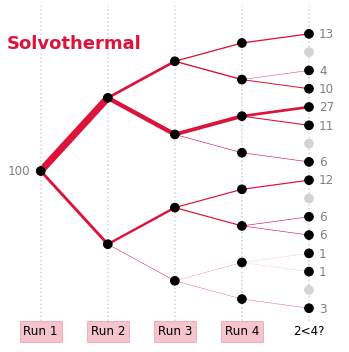

In [30]:
fig,ax = plt.subplots(1,1, figsize=(5,5))

ax.set_ylim(-4.75, 4.5)
ax.set_xlim(0.5, 5.5)

ax.axis('off')

len_plot = len_ST
plot_color = 'crimson'
pt_colors = [
    'k',
    'k','k',
    'k','k','k','k',
    'k','k','k','k','k','k','k','k',
    'k','lightgrey','k','k','k','k','lightgrey','k','k','lightgrey','k','k','k','k','lightgrey','k',
]

xs = [
    1, 
    2,2, 
    3,3,3,3, 
    4,4,4,4,4,4,4,4, 
    5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
]
ys = [
    0, 
    2,-2, 
    3,1,-1,-3, 
    3.5,2.5,1.5,0.5,-0.5,-1.5,-2.5,-3.5, 
    3.75,3.25,2.75,2.25,1.75,1.25,0.75,0.25,-0.25,-0.75,-1.25,-1.75,-2.25,-2.75,-3.25,-3.75
] 

ax.scatter(
    xs, ys,
    s = 75, color=pt_colors, zorder=2
)

width = len_plot[0] + len_plot[1] + len_plot[2] + len_plot[3] + len_plot[4] + len_plot[5] + len_plot[6] + len_plot[7]
ax.plot([1,2],[0,2], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[8] + len_plot[9] + len_plot[10] + len_plot[11] + len_plot[12] + len_plot[13] + len_plot[14] + len_plot[15]
ax.plot([1,2],[0,-2], linewidth=width/10, color=plot_color, zorder=1)



width = len_plot[0] + len_plot[1] + len_plot[2] + len_plot[3]
ax.plot([2,3],[2,3], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[4] + len_plot[5] + len_plot[6] + len_plot[7]
ax.plot([2,3],[2,1], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[8] + len_plot[9] + len_plot[10] + len_plot[11]
ax.plot([2,3],[-2,-1], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[12] + len_plot[13] + len_plot[14] + len_plot[15]
ax.plot([2,3],[-2,-3], linewidth=width/10, color=plot_color, zorder=1)



width = len_plot[0] + len_plot[1]
ax.plot([3,4],[3,3.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[2] + len_plot[3]
ax.plot([3,4],[3,2.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[4] + len_plot[5]
ax.plot([3,4],[1,1.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[6] + len_plot[7]
ax.plot([3,4],[1,0.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[8] + len_plot[9]
ax.plot([3,4],[-1,-0.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[10] + len_plot[11]
ax.plot([3,4],[-1,-1.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[12] + len_plot[13]
ax.plot([3,4],[-3,-2.5], linewidth=width/10, color=plot_color, zorder=1)

width = len_plot[14] + len_plot[15]
ax.plot([3,4],[-3,-3.5], linewidth=width/10, color=plot_color, zorder=1)



width = len_plot[0]
ax.plot([4,5],[3.5,3.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[1]
ax.plot([4,5],[3.5,3.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[2]
ax.plot([4,5],[2.5,2.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[3]
ax.plot([4,5],[2.5,2.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[4]
ax.plot([4,5],[1.5,1.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[5]
ax.plot([4,5],[1.5,1.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[6]
ax.plot([4,5],[0.5,0.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[7]
ax.plot([4,5],[0.5,0.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[8]
ax.plot([4,5],[-0.5,-0.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[9]
ax.plot([4,5],[-0.5,-0.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[10]
ax.plot([4,5],[-1.5,-1.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[11]
ax.plot([4,5],[-1.5,-1.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[12]
ax.plot([4,5],[-2.5,-2.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[13]
ax.plot([4,5],[-2.5,-2.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[14]
ax.plot([4,5],[-3.5,-3.25], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')

width = len_plot[15]
ax.plot([4,5],[-3.5,-3.75], linewidth=width/10, color=plot_color, zorder=1, linestyle='-')



ax.plot([1,1],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')
ax.plot([2,2],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')
ax.plot([3,3],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')
ax.plot([4,4],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')
ax.plot([5,5],[-4.1,4.5], linestyle=':', zorder=1, color='lightgrey')

ax.annotate('Run 1', fontsize=12,
            xy=(1,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox={'facecolor':plot_color, 'alpha':0.25, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Run 2', fontsize=12,
            xy=(2,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox={'facecolor':plot_color, 'alpha':0.25, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Run 3', fontsize=12,
            xy=(3,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox={'facecolor':plot_color, 'alpha':0.25, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Run 4', fontsize=12,
            xy=(4,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox={'facecolor':plot_color, 'alpha':0.25, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('2<4?', fontsize=12,
            xy=(5,-4.2), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            #bbox={'facecolor':plot_color, 'alpha':0.35, 'edgecolor':plot_color},
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Solvothermal', fontsize=18, fontweight='bold', color=plot_color,
            xy=(0.5,3.75), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            #bbox={'facecolor':plot_color, 'alpha':0.35, 'edgecolor':plot_color},
            horizontalalignment='left', verticalalignment='top')



for x,y,len_ in zip(xs[15:],ys[15:],len_plot):
    if len_ != 0:
        ax.annotate(len_, fontsize=12, color='grey',
                    xy=(x+0.15,y), xycoords='data',
                    xytext=(0,0), textcoords='offset points',
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    #bbox={'facecolor':plot_color, 'alpha':0.35, 'edgecolor':plot_color},
                    horizontalalignment='left', verticalalignment='center')
        
ax.annotate(sum(len_plot), fontsize=12, color='grey',
            xy=(1-0.15,0), xycoords='data',
            xytext=(0,0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            #bbox={'facecolor':plot_color, 'alpha':0.35, 'edgecolor':plot_color},
            horizontalalignment='right', verticalalignment='center')        
        
fig.tight_layout()
fig.savefig('output_interpretation//TreeDiagram_CCE_ST.png')

## Correlations between AMF Scores

In [31]:
path = 'data_synth\\ALL_Volumes+AMF.csv'
df_amf = pd.read_csv(path, index_col=0)
print(len(df_amf))
df_amf

192


,V_Co3O(OH),V_Co3O,V_Co4O4,V_Ce,V_Dy,V_Yb,V_OA,V_SA,V_TMTACN,V_MeOH,AMF,AMF_rt,AMF_50,AMF_ST
CCE_1_0,1.28,2.24,0.50,0.00,0.00,0.44,0.0,0.59,0.00,2.46,0.16,0.14,0.19,0.51
CCE_1_1,2.31,0.60,0.35,0.00,0.62,0.00,0.0,0.62,0.00,3.01,0.22,0.22,0.22,0.51
CCE_1_2,0.90,2.96,1.25,1.65,0.00,0.00,0.0,0.00,0.71,0.04,0.21,0.19,0.22,0.52
CCE_1_3,2.17,1.77,1.73,0.00,0.00,0.00,0.0,0.24,0.00,1.60,0.23,0.18,0.20,0.56
CCE_1_4,2.94,0.26,1.31,0.00,0.00,1.58,0.0,0.00,0.00,1.41,0.25,0.22,0.22,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCE_4_43,0.25,0.03,0.50,0.00,0.00,0.00,0.0,0.00,4.40,2.33,0.51,0.50,0.46,0.54
CCE_4_44,1.61,0.79,0.81,0.00,0.00,0.00,0.0,0.00,1.97,2.32,0.30,0.28,0.32,0.50
CCE_4_45,1.19,1.50,1.97,0.00,0.00,0.00,0.0,1.40,0.00,1.43,0.16,0.10,0.24,0.50
CCE_4_46,0.26,0.00,4.45,0.00,0.00,0.00,0.0,0.00,1.65,1.14,0.22,0.13,0.32,0.50


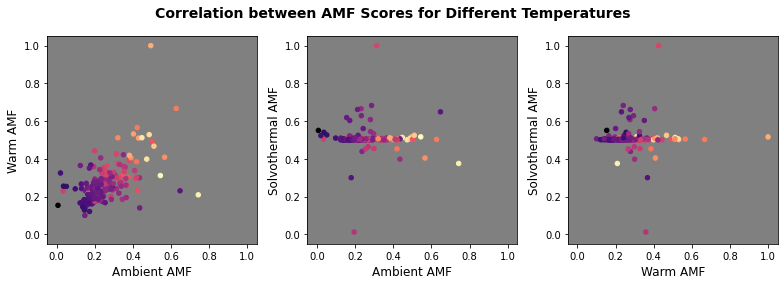

In [32]:
fig,ax = plt.subplots(1,3, figsize=(11,4))

back_color='grey'
cmap = 'magma'

ax[0].set_xlim(-0.05,1.05)
ax[0].set_ylim(-0.05,1.05)
ax[0].scatter(df_rt_amf['Score'], df_50_amf['Score'], s=20, c=df_amf['AMF'], cmap=cmap)
ax[0].set_facecolor(back_color)
ax[0].set_xlabel('Ambient AMF', fontsize=12)
ax[0].set_ylabel('Warm AMF', fontsize=12)

ax[1].set_xlim(-0.05,1.05)
ax[1].set_ylim(-0.05,1.05)
ax[1].scatter(df_rt_amf['Score'], df_ST_amf['Score'], s=20, c=df_amf['AMF'], cmap=cmap)
ax[1].set_facecolor(back_color)
ax[1].set_xlabel('Ambient AMF', fontsize=12)
ax[1].set_ylabel('Solvothermal AMF', fontsize=12)

ax[2].set_xlim(-0.05,1.05)
ax[2].set_ylim(-0.05,1.05)
ax[2].scatter(df_50_amf['Score'], df_ST_amf['Score'], s=20, c=df_amf['AMF'], cmap=cmap)
ax[2].set_facecolor(back_color)
ax[2].set_xlabel('Warm AMF', fontsize=12)
ax[2].set_ylabel('Solvothermal AMF', fontsize=12)

### want to colour by overall AMF

fig.suptitle('Correlation between AMF Scores for Different Temperatures', fontsize=14, fontweight='bold')

fig.tight_layout()
fig.savefig('output_interpretation//Temperature Correlation btwn CCE AMF.png')